In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

grades = pd.read_csv("./grades.csv")
grades

income_train = pd.read_csv("./income_train.csv", header=None)
income_test = pd.read_csv("./income_test.csv", skiprows=1, header=None)
income = pd.concat((income_train, income_test)).reset_index()
income[6] = income[6].replace(' ?', "Unknown6")
income[13] = income[13].replace(' ?', "Unknown13")
income[14] = income[14].replace(' >50K.', " >50K")
income[14] = income[14].replace(' <=50K.', " <=50K")

task = "income"

In [8]:
income

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,16277,64,?,321403,HS-grad,9,Widowed,Unknown6,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [12]:
if task == "grades":
    X = grades.drop("GRADE", axis=1)
    y = grades.GRADE

    for cat in ["PUPIL_SEX", "PUPIL_CLASS"]:
        one_hot = pd.get_dummies(X[cat])
        X = X.drop(cat, axis = 1)
        X = X.join(one_hot)
        
else:
    X = income.drop(14, axis=1)
    y = income[14]

    for cat in tqdm([1, 3, 5, 6, 7, 8, 9, 13]):
        one_hot = pd.get_dummies(X[cat])
        X = X.drop(cat, axis = 1)
        X = X.join(one_hot)
        
X.columns = X.columns.astype(str)

100%|█████████████████████████████████████████████| 8/8 [00:00<00:00, 67.16it/s]


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

In [14]:
t_acc =[]
t_pr = []
t_rec = []
t_f = []
train_sizes = [0.00005, 0.6,0.7,0.8,0.9]

criterion = "gini" # “entropy”, “log_loss”
splitter = "best" # "random"


for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size)
    tree = DecisionTreeClassifier(criterion=criterion, splitter=splitter,)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    pr, rec, f, _ = precision_recall_fscore_support(y_test, y_pred)
    
    t_acc.append(acc)
    t_pr.append(pr)
    t_rec.append(rec)
    t_f.append(t_f)
    
    print(f"Разделение train {train_size * 100}% / {(1 - train_size) * 100}% test")
    print(f"Accuracy: {acc}")
    print(f"Precision: {pr}")
    print(f"Recall: {rec}")
    print(f"F-score: {f}")
    print()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Разделение train 0.005% / 99.995% test
Accuracy: 0.7607084357084357
Precision: [0.76070844 0.        ]
Recall: [1. 0.]
F-score: [0.86409359 0.        ]

Разделение train 60.0% / 40.0% test
Accuracy: 0.8105645697906536
Precision: [0.87225589 0.61510561]
Recall: [0.87775293 0.60313808]
F-score: [0.87499578 0.60906306]

Разделение train 70.0% / 30.000000000000004% test
Accuracy: 0.8121203849041152
Precision: [0.8758371 0.6167083]
Recall: [0.87512433 0.61825264]
F-score: [0.87548057 0.61747951]

Разделение train 80.0% / 19.999999999999996% test
Accuracy: 0.8142082096427474
Precision: [0.87987013 0.61001262]
Recall: [0.87525232 0.6201882 ]
F-score: [0.87755515 0.61505832]

Разделение train 90.0% / 9.999999999999998% test
Accuracy: 0.8065506653019447
Precision: [0.87435409 0.60016556]
Recall: [0.86938886 0.61078349]
F-score: [0.87186441 0.60542797]



[Text(0.5159437809856111, 0.9912280701754386, 'x[34] <= 0.5\ngini = 0.364\nsamples = 43957\nvalue = [33457, 10500]'),
 Text(0.2366495894431036, 0.9736842105263158, 'x[4] <= 7055.5\ngini = 0.12\nsamples = 23841\nvalue = [22313, 1528]'),
 Text(0.20210111697798086, 0.956140350877193, 'x[3] <= 13.5\ngini = 0.091\nsamples = 23413\nvalue = [22299, 1114]'),
 Text(0.16405259906962608, 0.9385964912280702, 'x[5] <= 2218.5\ngini = 0.069\nsamples = 22138\nvalue = [21348.0, 790.0]'),
 Text(0.11086076702151515, 0.9210526315789473, 'x[6] <= 42.5\ngini = 0.064\nsamples = 22020\nvalue = [21291.0, 729.0]'),
 Text(0.05596037070083044, 0.9035087719298246, 'x[1] <= 33.5\ngini = 0.037\nsamples = 17891\nvalue = [17551, 340]'),
 Text(0.02267344806700545, 0.8859649122807017, 'x[33] <= 0.5\ngini = 0.011\nsamples = 10594\nvalue = [10533, 61]'),
 Text(0.017170677070940013, 0.868421052631579, 'x[25] <= 0.5\ngini = 0.011\nsamples = 10574\nvalue = [10518, 56]'),
 Text(0.008840596395660122, 0.8508771929824561, 'x[2] 

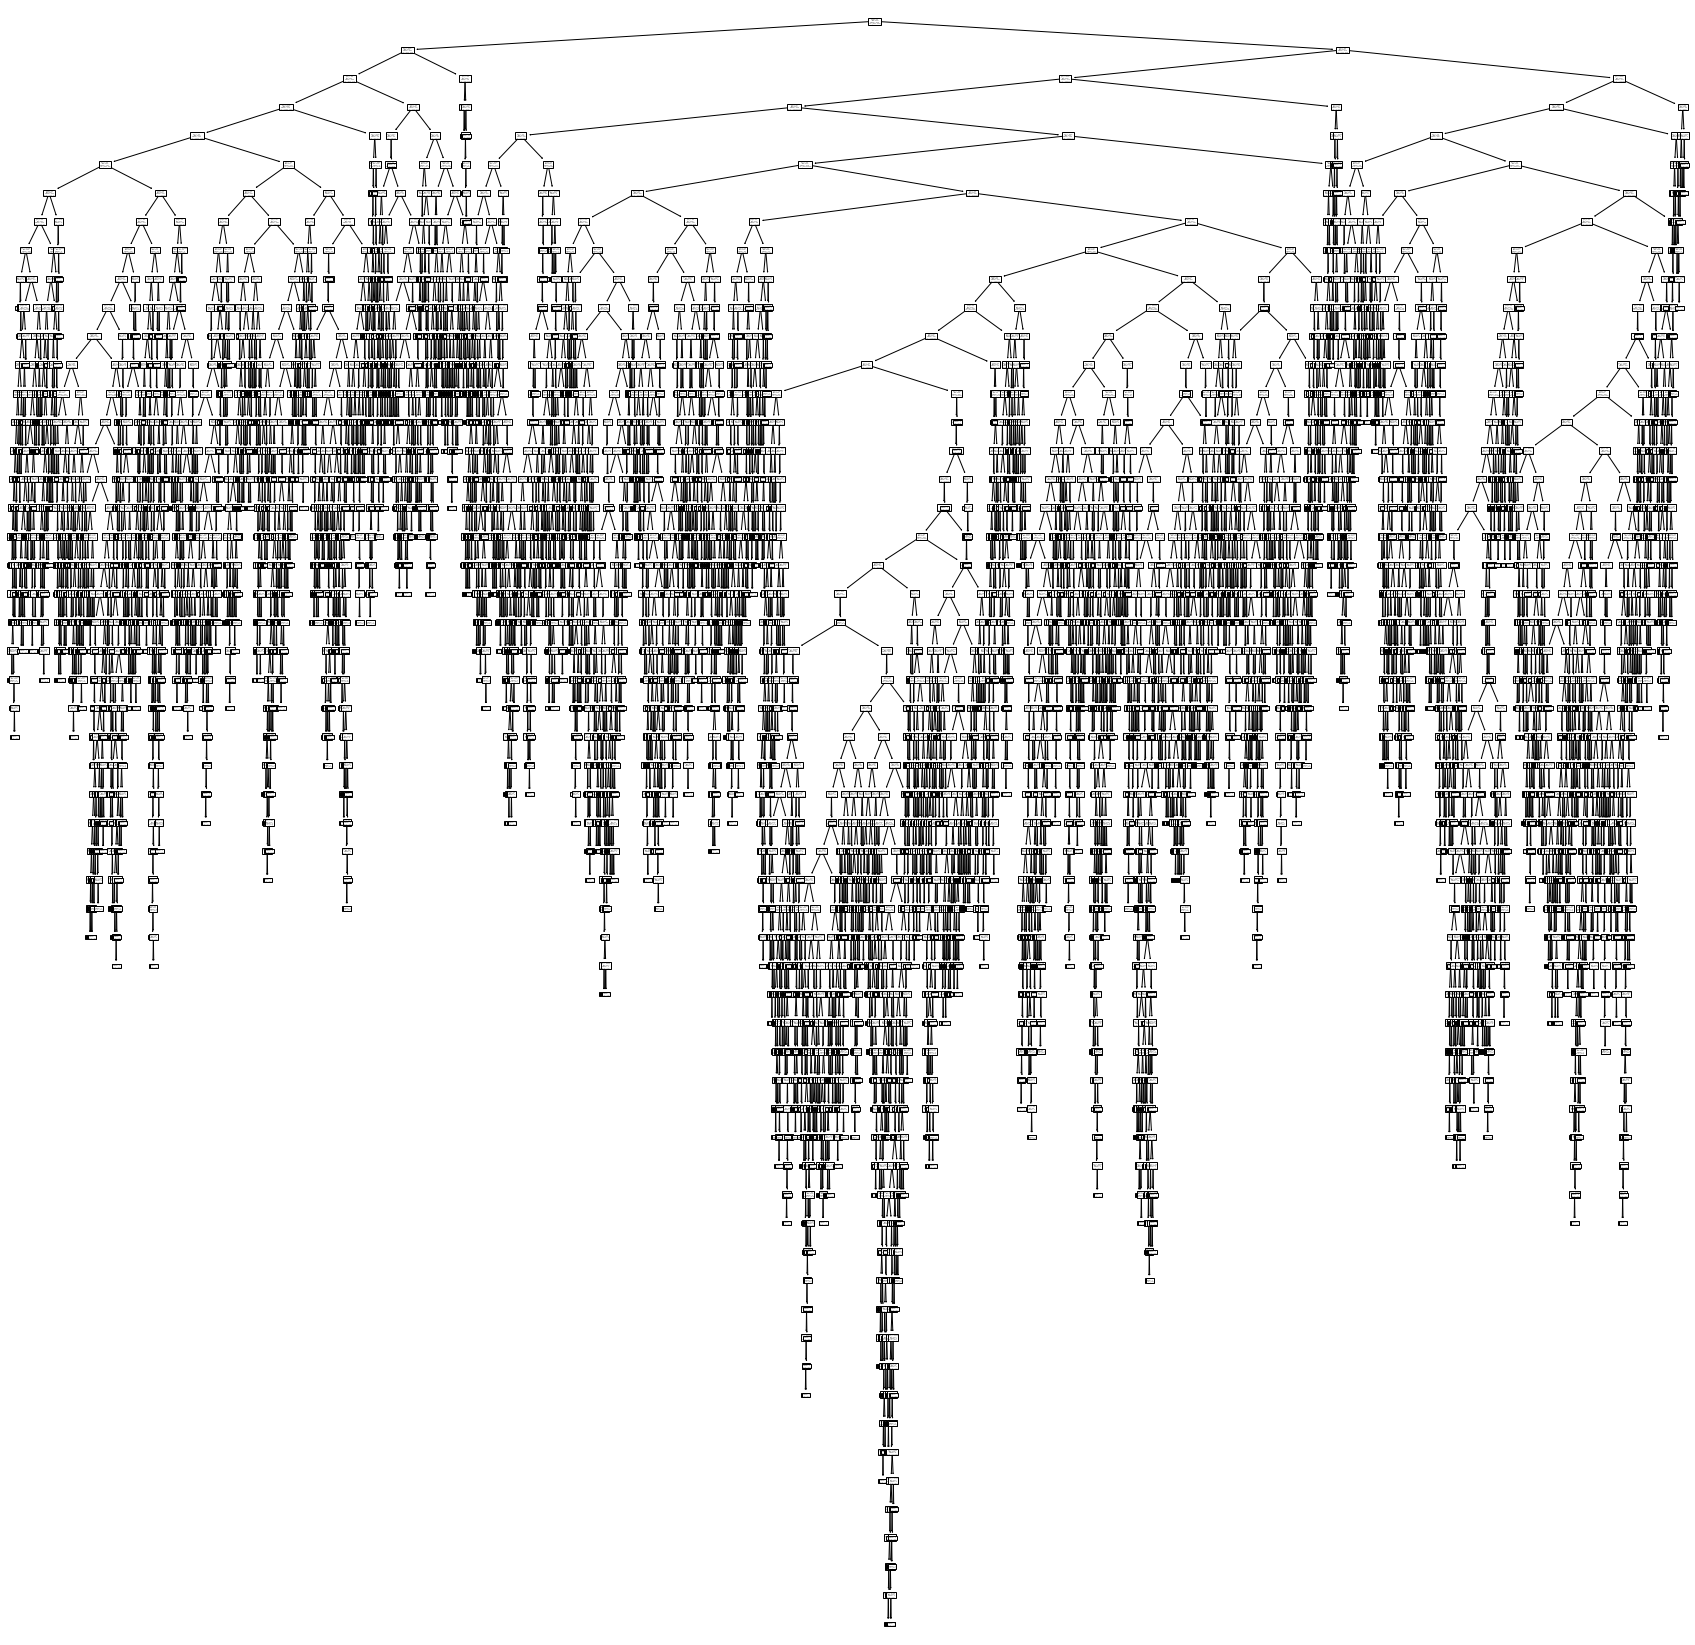

In [17]:
plt.figure(figsize=(30,30))
plot_tree(tree)

Text(0, 0.5, 'Accuracy')

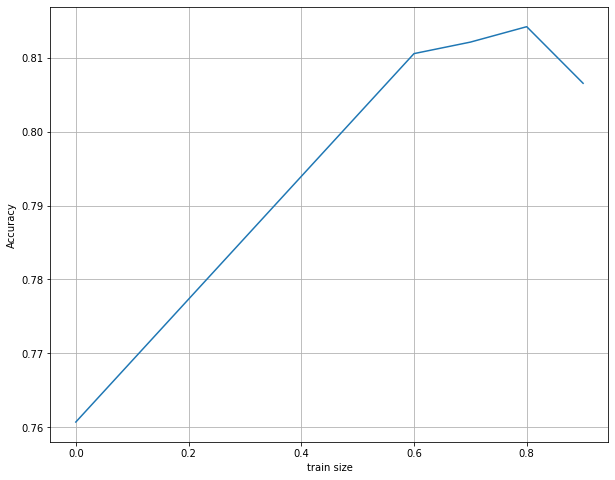

In [16]:
plt.figure(figsize=(10,8))
plt.plot(train_sizes, t_acc)
plt.grid()
plt.xlabel("train size")
plt.ylabel("Accuracy")
